<a href="https://colab.research.google.com/github/SaachiDholakia/BA_865/blob/main/Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# German Traffic Sign Recognition Dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
traffic_dataset = ('/content/drive/MyDrive/German Traffic Sign/Meta')
train_path = ('/content/drive/MyDrive/German Traffic Sign/Train')
test_path = ('/content/drive/MyDrive/German Traffic Sign/Test')

In [ ]:
train_imgs = 0
for image_dir in os.listdir(train_path):
    image_dir_path = train_path+'/'+image_dir
    train_imgs+=len(os.listdir(image_dir_path))

num_categories = len(os.listdir(train_path))
num_test_data = len(os.listdir(test_path))


print(f"Total no. of categories: {num_categories}\nNo. of total images: {num_test_data+train_imgs}\nTotal no. of images in training dir: {train_imgs}\nTotal no. of image in testing dir: {num_test_data}")

Total no. of categories: 43
No. of total images: 52851
Total no. of images in training dir: 40140
Total no. of image in testing dir: 12711


In [ ]:
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)',
            2:'Speed limit (50km/h)',
            3:'Speed limit (60km/h)',
            4:'Speed limit (70km/h)',
            5:'Speed limit (80km/h)',
            6:'End of speed limit (80km/h)',
            7:'Speed limit (100km/h)',
            8:'Speed limit (120km/h)',
            9:'No passing',
            10:'No passing for trucks in excess of 3.5 tons authorized weight',
            11:'Right of way',
            12:'Priority road',
            13:'Yield right of way',
            14:'Stop',
            15:'Prohibited for all vehicles',
            16:'Tractor and trucks with an authorized loaded weight of more than 3.5 tons prohibited',
            17:'Entry prohibited',
            18:'Danger',
            19:'Dangerous curve left',
            20:'Dangerous curve right',
            21:'Double curve',
            22:'Rough road',
            23:'Slippery road',
            24:'Road narrows',
            25:'Construction site',
            26:'Signals lights ahead',
            27:'Pedestrians crosswalk ahead',
            28:'Children crossing',
            29:'Bicycles crossing',
            30:'Beware of ice/snow',
            31:'Wild animals crossing',
            32:'End of restrictions',
            33:'Mandatory direction of travel(right)',
            34:'Mandatory direction of travel(left)',
            35:'AMandatory direction of travel(ahead)',
            36:'Mandatory direction of travel(ahead or right)',
            37:'Mandatory direction of travel(ahead or left)',
            38:'Keep right',
            39:'Keep left',
            40:'Traffic circle',
            41:'End of passing zone',
            42:'End of passing zone of more than 3.5 tons'
            }

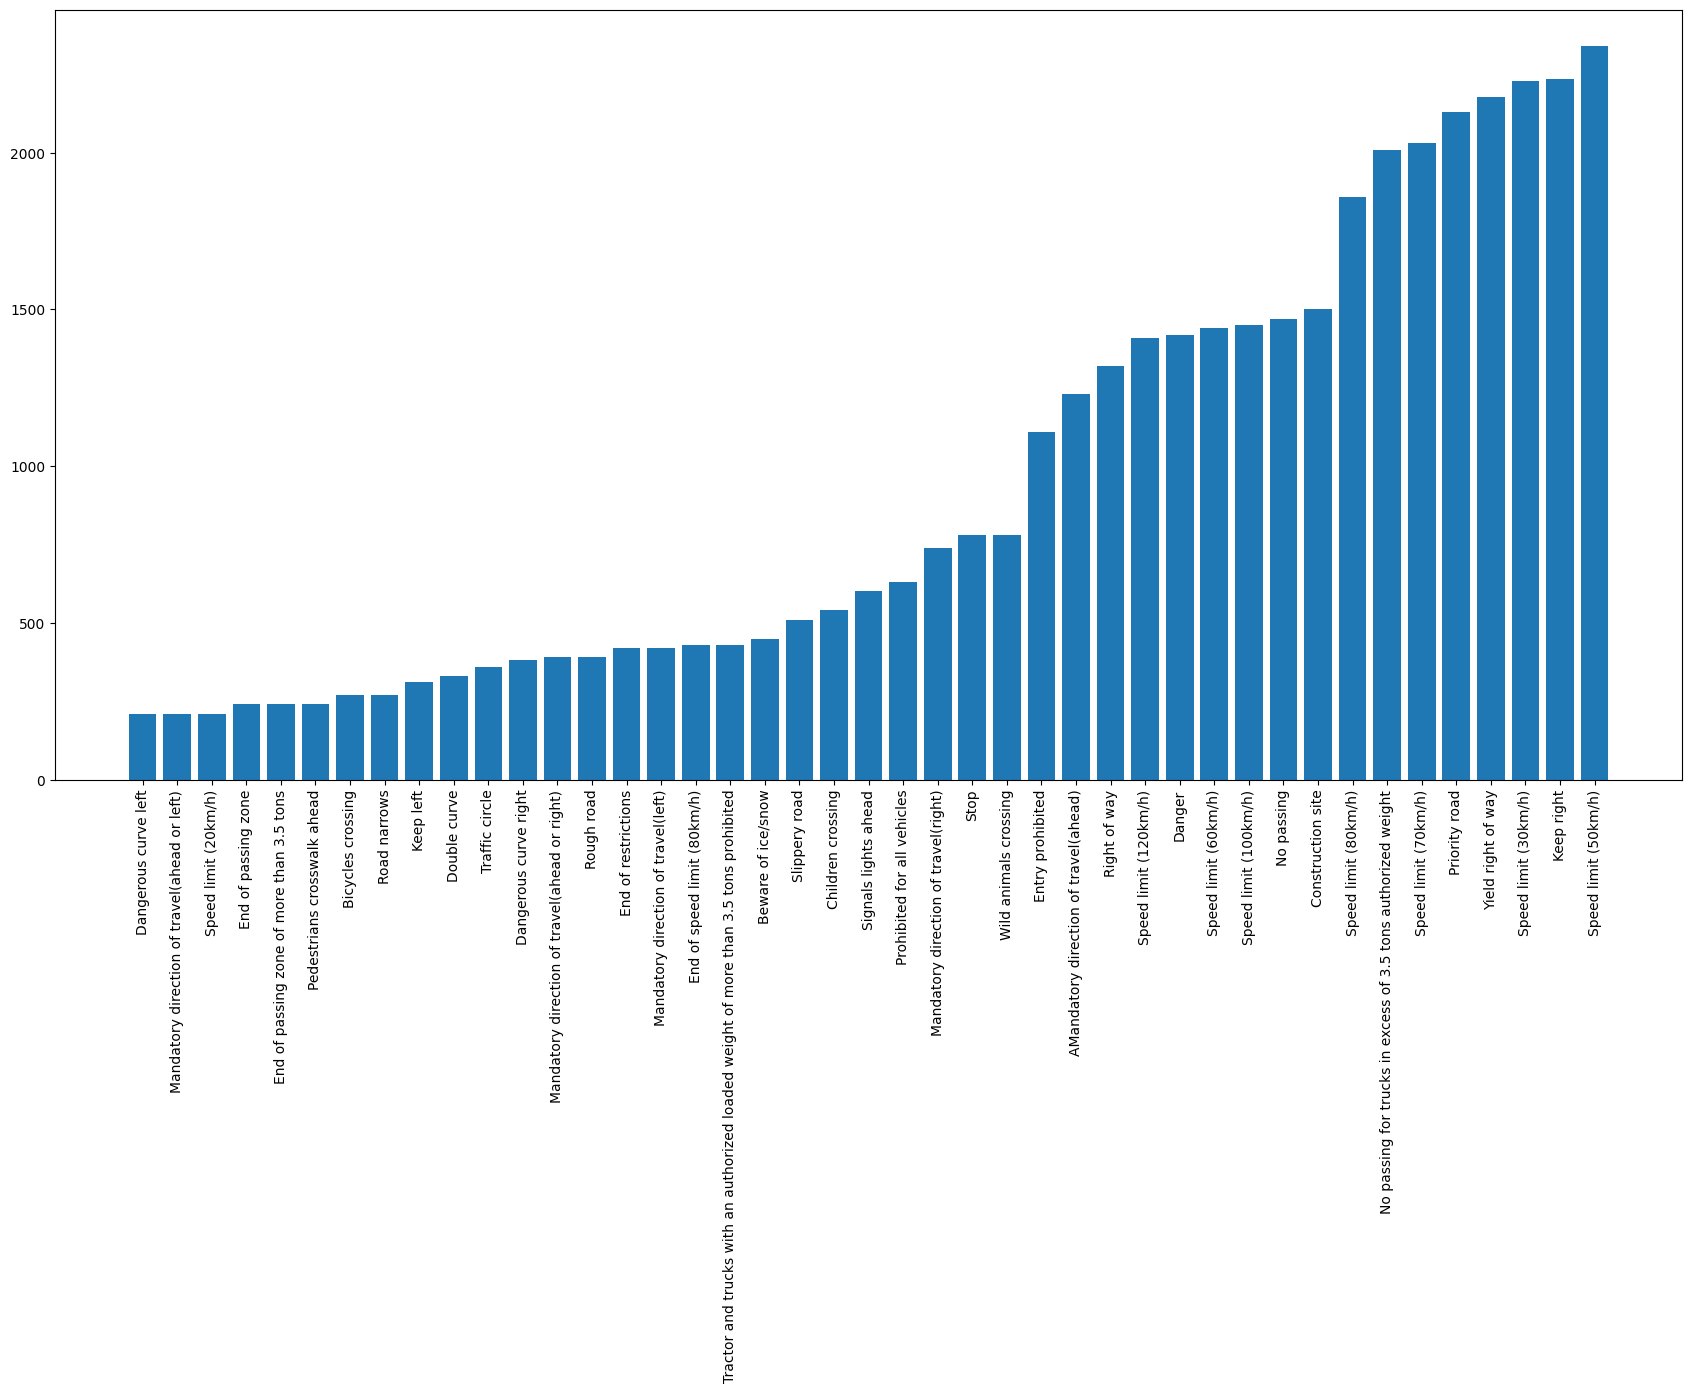

In [ ]:
folders = os.listdir(train_path)

train_number = []
class_num = []

for folder in folders:
    train_files = os.listdir(train_path + '/' + folder)
    train_number.append(len(train_files))
    class_num.append(classes[int(folder)])

# Sorting the dataset on the basis of number of images in each class
zipped_lists = zip(train_number, class_num)
sorted_pairs = sorted(zipped_lists)
tuples = zip(*sorted_pairs)
train_number, class_num = [ list(tuple) for tuple in  tuples]

# Plotting the number of images in each class
plt.figure(figsize=(21,10))
plt.bar(class_num, train_number)
plt.xticks(class_num, rotation='vertical')
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/German Traffic Sign/Meta/Test/00000.png'

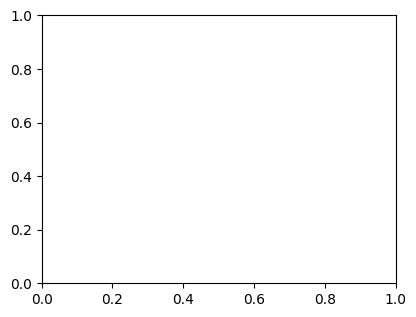

In [ ]:
import numpy as np
import pandas as pd
import random
from matplotlib.image import imread

test = pd.read_csv('/content/drive/MyDrive/German Traffic Sign/Test.csv')
imgs = test["Path"].values

plt.figure(figsize=(21,16))

for i in range(0,16):
    plt.subplot(4,4,i+1)
    img_path = traffic_dataset + '/' + imgs[i]
    img_class = classes[test.loc[test['Path']==imgs[i],'ClassId'].iloc[0]]
    img = imread(img_path)
    plt.imshow(img)
    plt.xlabel(f"Sign: {img_class}", fontsize = 12)
    plt.ylabel(f"shape: ({img.shape[0]},{img.shape[1]})", fontsize = 12)

In [ ]:
import cv2
from PIL import Image

resize_h,resize_w = 30,30

image_data = []
image_labels = []

for i in range(42):
    path = train_path + '/' + str(i)
    images = os.listdir(path)
    print(path)
    for img in images:
        print(img)
        try:
            image = cv2.imread(path + '/' + img)
            image_fromarray = Image.fromarray(image, 'RGB')
            resize_image = image_fromarray.resize((resize_h, resize_w))
            image_data.append(np.array(resize_image))
            image_labels.append(i)
        except Exception as e:
            print("Unable to read image " + img, e,sep='\n')

Streaming output truncated to the last 5000 lines.
00002_00026_00021.png
00002_00038_00015.png
00002_00020_00018.png
00002_00035_00029.png
00002_00007_00006.png
00002_00070_00000.png
00002_00039_00013.png
00002_00038_00022.png
00002_00052_00022.png
00002_00061_00006.png
00002_00015_00017.png
00002_00045_00029.png
00002_00072_00025.png
00002_00015_00019.png
00002_00050_00000.png
00002_00030_00007.png
00002_00011_00010.png
00002_00033_00025.png
00002_00004_00026.png
00002_00024_00003.png
00002_00062_00024.png
00002_00043_00010.png
00002_00023_00015.png
00002_00022_00022.png
00002_00063_00017.png
00002_00036_00028.png
00002_00072_00007.png
00002_00006_00012.png
00002_00040_00021.png
00002_00046_00028.png
00002_00036_00003.png
00002_00065_00020.png
00002_00045_00010.png
00002_00042_00000.png
00002_00027_00004.png
00002_00043_00009.png
00002_00051_00008.png
00002_00071_00026.png
00002_00063_00015.png
00002_00003_00022.png
00002_00054_00015.png
00002_00037_00028.png
00002_00031_00026.png
000

In [ ]:
image_data = np.array(image_data)
image_labels = np.array(image_labels)

In [ ]:
print(image_data.shape, image_labels.shape)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(image_data, image_labels, test_size=0.2, random_state=0, shuffle=True)

X_train = X_train/255
X_val = X_val/255

In [ ]:
print("X_train.shape", X_train.shape)
print("X_valid.shape", X_val.shape)
print("y_train.shape", y_train.shape)
print("y_valid.shape", y_val.shape)

X_train.shape (32112, 30, 30, 3)
X_valid.shape (8028, 30, 30, 3)
y_train.shape (32112,)
y_valid.shape (8028,)


In [ ]:
import tensorflow as tf

y_train = tf.keras.utils.to_categorical(y_train, num_categories)
y_val = tf.keras.utils.to_categorical(y_val, num_categories)

print(y_train.shape)
print(y_val.shape)

(32112, 43)
(8028, 43)
